<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/cluster_merit_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [74]:
import warnings

warnings.filterwarnings('ignore')

input

In [75]:
df = pd.read_csv("EPS coded data_merit.csv")

exploratory

In [76]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   OP1                                  3329 non-null   int64  
 1   OP2                                  3329 non-null   int64  
 2   OP3                                  3329 non-null   int64  
 3   OP4                                  3329 non-null   int64  
 4   OP5                                  3329 non-null   int64  
 5   OP6                                  3329 non-null   int64  
 6   OP7                                  3329 non-null   int64  
 7   Desired Pay Mix (less LTI)           3329 non-null   float64
 8   Desired Pay Mix                      3329 non-null   float64
 9   Base Pay Diff                        3329 non-null   float64
 10  Bonus Pay Diff                       3329 non-null   float64
 11  Likelihood of retention for 3 

In [77]:
df.head()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff,Likelihood of retention for 3 years,Strong Colleague Network
0,0,0,0,0,1,0,0,0.125000,0.3,1.3,1.5,4.0,4.0
1,0,0,1,0,0,0,0,0.250000,0.4,1.5,1.5,5.0,4.0
2,0,1,0,0,0,0,0,0.300000,0.3,1.3,1.3,4.0,3.0
3,0,1,0,0,0,0,0,0.222222,0.3,1.3,1.3,5.0,5.0
4,0,0,0,0,1,0,0,0.125000,0.3,1.5,1.5,5.0,5.0


checks

In [78]:
df.isnull().sum()
df.describe()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff,Likelihood of retention for 3 years,Strong Colleague Network
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3328.000000,3328.000000
mean,0.089817,0.284169,0.342145,0.021628,0.179634,0.042355,0.040252,0.268987,0.347570,1.695374,1.717062,3.789964,3.660457
std,0.285962,0.451086,0.474499,0.145488,0.383940,0.201428,0.196580,0.093571,0.089225,0.269152,0.276911,1.079940,0.968440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.300000,1.300000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.300000,1.500000,1.500000,3.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158,0.300000,1.700000,1.700000,4.000000,4.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.400000,1.900000,1.900000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.100000,2.100000,5.000000,5.000000


In [79]:
X=df

Scaling

In [80]:
cols = X.columns

In [81]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [82]:
X = pd.DataFrame(X, columns=[cols])

In [83]:
X.head()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff,Likelihood of retention for 3 years,Strong Colleague Network
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.00,0.25,0.75,0.75
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.142857,0.25,0.25,1.00,0.75
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.00,0.00,0.75,0.50
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.00,0.00,1.00,1.00
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.25,0.25,1.00,1.00


In [84]:
X.dropna(inplace=True)
X

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff,Likelihood of retention for 3 years,Strong Colleague Network
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.00,0.25,0.75,0.75
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.142857,0.25,0.25,1.00,0.75
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.00,0.00,0.75,0.50
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.00,0.00,1.00,1.00
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.25,0.25,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.000000,1.00,0.50,0.50,0.75
3325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.75,0.75,0.75,0.75
3326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.75,0.75,0.50,0.75
3327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.000000,0.75,1.00,0.00,0.00


K means

In [85]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [86]:
kmeans.cluster_centers_

array([[ 1.36592051e-01,  4.31703974e-01, -3.66373598e-15,
         3.28917314e-02,  2.73184102e-01,  6.44129740e-02,
         6.12151667e-02,  2.68809921e-01,  5.91724858e-02,
         5.03997259e-01,  5.29237095e-01,  6.81932389e-01,
         6.57035176e-01],
       [ 0.00000000e+00,  3.88578059e-16,  1.00000000e+00,
         2.63677968e-16,  0.00000000e+00, -4.78783679e-16,
        -2.08166817e-16,  2.69285219e-01,  8.48363226e-02,
         4.74978051e-01,  5.05926251e-01,  7.27392450e-01,
         6.80640913e-01]])

inertia

In [87]:
kmeans.inertia_

2849.551065053741

Elbow

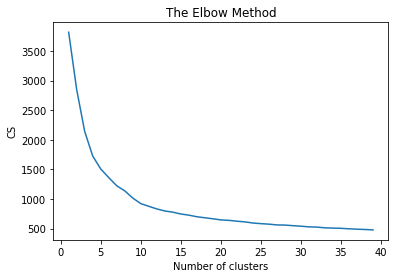

In [88]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

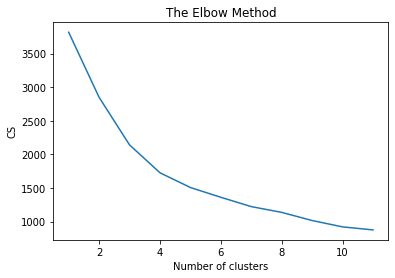

In [89]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [91]:
labels=kmeans.labels_
print(labels)

[3 5 2 ... 2 3 2]


In [92]:
Z=kmeans.cluster_centers_
Z

array([[ 1.00000000e+00, -6.66133815e-16, -3.88578059e-16,
        -2.42861287e-17,  0.00000000e+00,  8.32667268e-17,
        -4.16333634e-17,  2.76311480e-01,  9.55566173e-02,
         4.45652174e-01,  4.37290970e-01,  6.72240803e-01,
         6.28762542e-01],
       [ 0.00000000e+00, -2.10942375e-15,  1.00000000e+00,
         1.66533454e-16,  0.00000000e+00,  1.11022302e-16,
        -1.73472348e-16,  2.65083066e-01,  7.98720682e-02,
         6.80597015e-01,  7.22761194e-01,  7.32462687e-01,
         6.88432836e-01],
       [ 0.00000000e+00,  1.00000000e+00,  3.77475828e-15,
         2.35922393e-16,  0.00000000e+00, -2.42861287e-16,
        -1.94289029e-16,  2.73522487e-01,  4.11186697e-02,
         5.06613757e-01,  5.39947090e-01,  6.72222222e-01,
         6.64021164e-01],
       [ 0.00000000e+00, -1.94289029e-15,  2.16493490e-15,
         1.38777878e-16,  1.00000000e+00,  1.11022302e-16,
        -1.59594560e-16,  2.54583718e-01,  4.38843765e-02,
         5.47658863e-01,  5.66471572e

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3328 samples in 0.007s...
[t-SNE] Computed neighbors for 3328 samples in 0.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3328
[t-SNE] Computed conditional probabilities for sample 2000 / 3328
[t-SNE] Computed conditional probabilities for sample 3000 / 3328
[t-SNE] Computed conditional probabilities for sample 3328 / 3328
[t-SNE] Mean sigma: 0.233688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.429367
[t-SNE] KL divergence after 5000 iterations: 0.414397


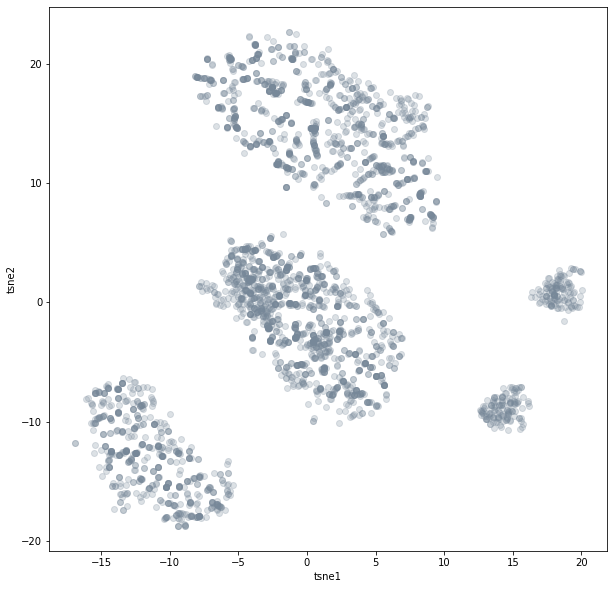

In [93]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [94]:
import matplotlib

In [95]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3328 samples in 0.006s...
[t-SNE] Computed neighbors for 3328 samples in 0.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3328
[t-SNE] Computed conditional probabilities for sample 2000 / 3328
[t-SNE] Computed conditional probabilities for sample 3000 / 3328
[t-SNE] Computed conditional probabilities for sample 3328 / 3328
[t-SNE] Mean sigma: 0.233688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.714073
[t-SNE] KL divergence after 2500 iterations: 0.552022


In [96]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

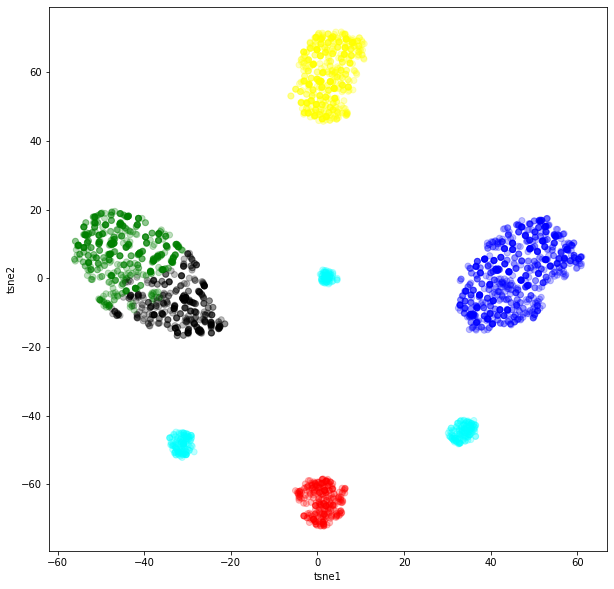

In [97]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [98]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 1.00000000e+00, -6.66133815e-16, -3.88578059e-16,
        -2.42861287e-17,  0.00000000e+00,  8.32667268e-17,
        -4.16333634e-17,  2.76311480e-01,  3.66889632e-01,
         1.65652174e+00,  1.64983278e+00,  3.68896321e+00,
         3.51505017e+00],
       [ 0.00000000e+00, -2.10942375e-15,  1.00000000e+00,
         1.66533454e-16,  0.00000000e+00,  1.11022302e-16,
        -1.73472348e-16,  2.65083066e-01,  3.55910448e-01,
         1.84447761e+00,  1.87820896e+00,  3.92985075e+00,
         3.75373134e+00],
       [ 0.00000000e+00,  1.00000000e+00,  3.77475828e-15,
         2.35922393e-16,  0.00000000e+00, -2.42861287e-16,
        -1.94289029e-16,  2.73522487e-01,  3.28783069e-01,
         1.70529101e+00,  1.73195767e+00,  3.68888889e+00,
         3.65608466e+00],
       [ 0.00000000e+00, -1.94289029e-15,  2.16493490e-15,
         1.38777878e-16,  1.00000000e+00,  1.11022302e-16,
        -1.59594560e-16,  2.54583718e-01,  3.30719064e-01,
         1.73812709e+00,  1.75317726e